# Lab 6: Clustering Algorithms

## Objective
This lab introduces you to clustering algorithms using the famous Iris dataset. We'll explore different clustering techniques including K-Means, Hierarchical Clustering, and DBSCAN.

## Dataset
We'll use the **Iris dataset** - one of the most famous small datasets in machine learning. It contains 150 samples of iris flowers with 4 features (sepal length, sepal width, petal length, petal width) and 3 species (setosa, versicolor, virginica).


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## 1. Load and Explore the Dataset


In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Dataset shape:", X.shape)
print("\nFeature names:", feature_names)
print("\nTarget names:", target_names)
print("\nTarget distribution:")
print(np.bincount(y))


Dataset shape: (150, 4)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: ['setosa' 'versicolor' 'virginica']

Target distribution:
[50 50 50]


In [3]:
# Create a DataFrame for easier analysis
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

print("First 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())


First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-

## 2. Data Visualization


<Figure size 1200x1000 with 0 Axes>

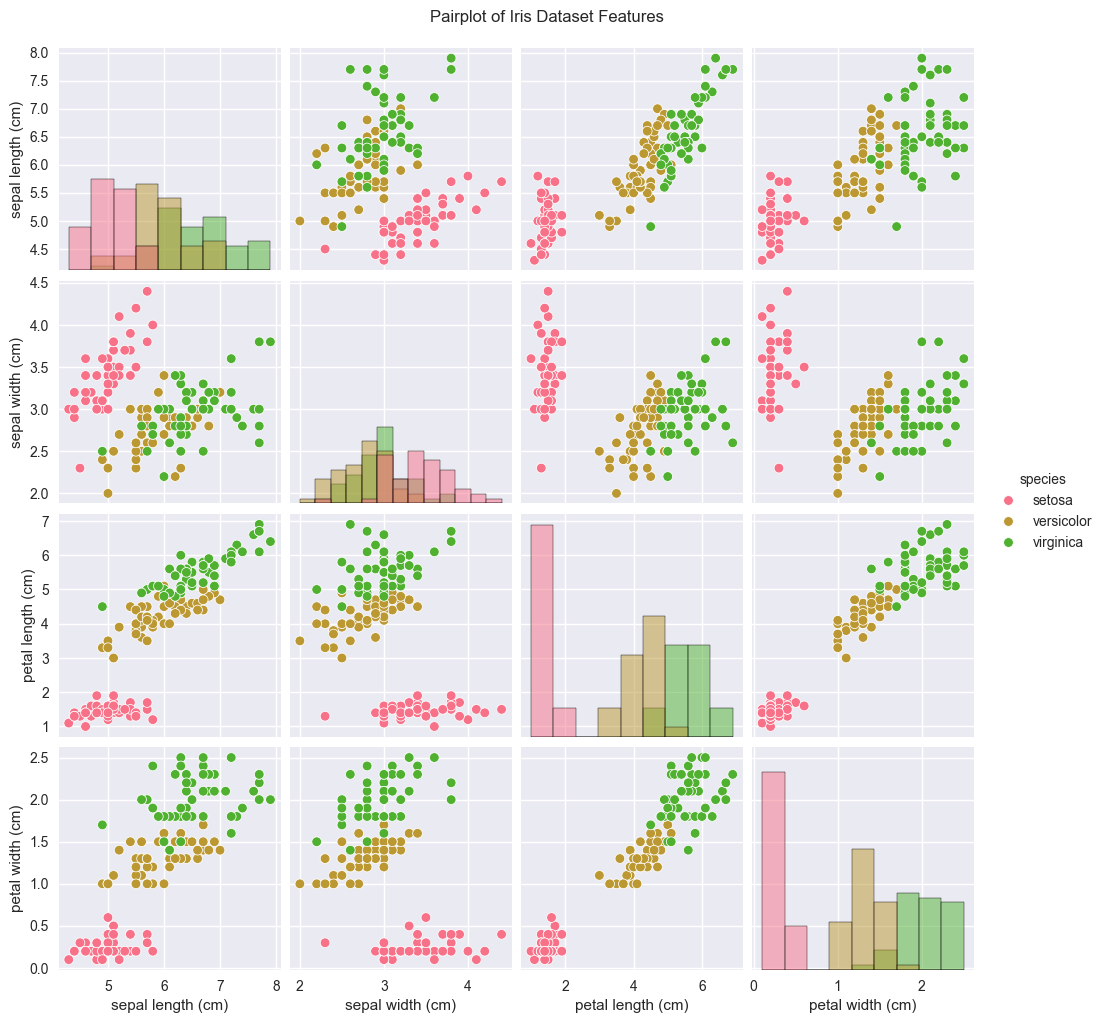

In [4]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)
plt.show()


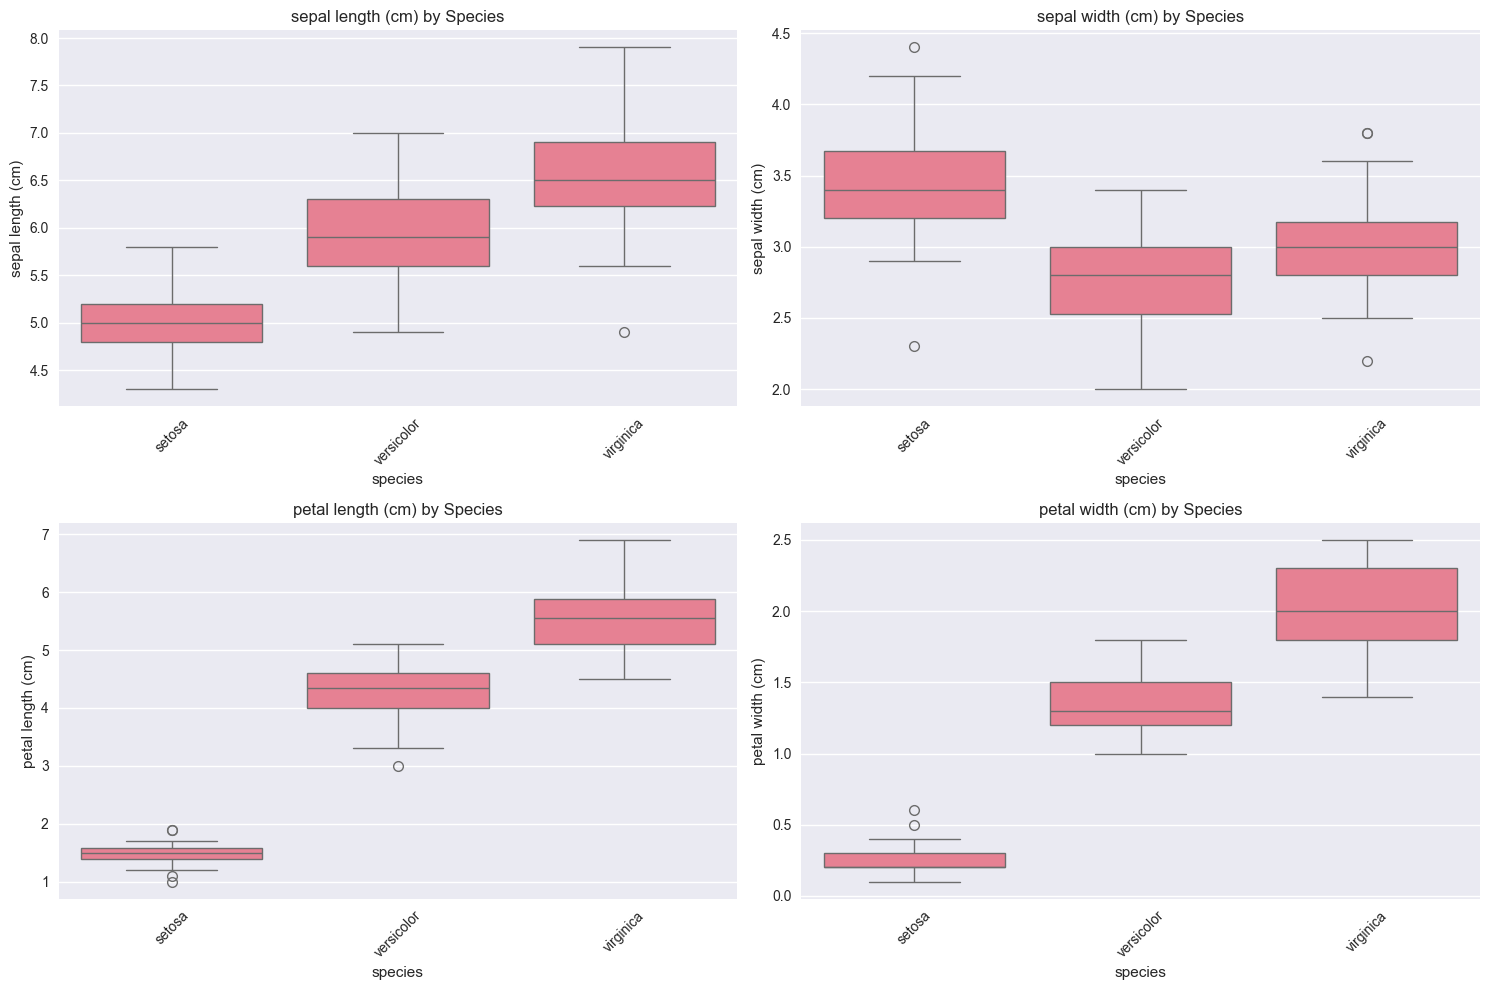

In [5]:
# Box plots for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(feature_names):
    sns.boxplot(data=df, x='species', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Species')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 3. Data Preprocessing


In [6]:
# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original data shape:", X.shape)
print("Scaled data shape:", X_scaled.shape)
print("\nOriginal data statistics:")
print(pd.DataFrame(X, columns=feature_names).describe())
print("\nScaled data statistics:")
print(pd.DataFrame(X_scaled, columns=feature_names).describe())


Original data shape: (150, 4)
Scaled data shape: (150, 4)

Original data statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Scaled data statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count

## 4. K-Means Clustering


In [7]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means cluster centers:")
print(kmeans.cluster_centers_)

print("\nCluster assignments:")
print(np.bincount(kmeans_labels))

# Calculate inertia (within-cluster sum of squares)
print(f"\nInertia (WCSS): {kmeans.inertia_:.2f}")


K-Means cluster centers:
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]

Cluster assignments:
[53 50 47]

Inertia (WCSS): 139.82


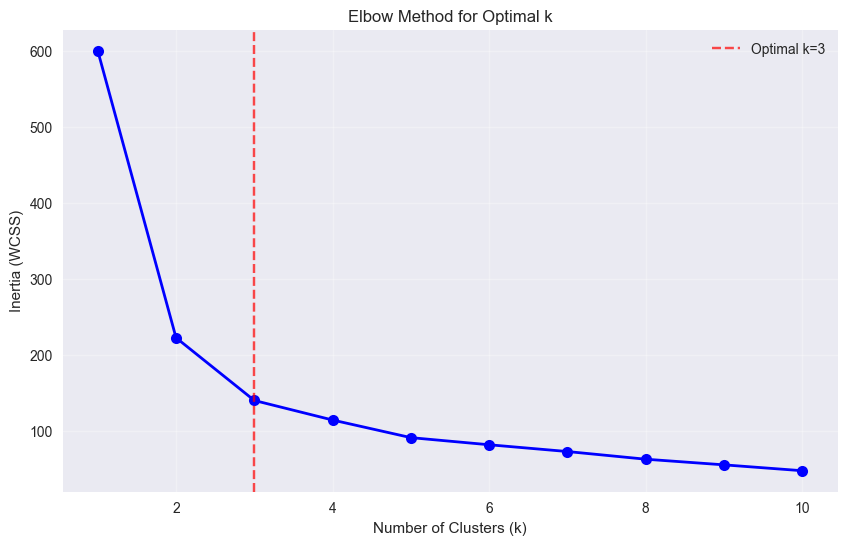

In [8]:
# Elbow method to find optimal number of clusters
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Optimal k=3')
plt.legend()
plt.show()


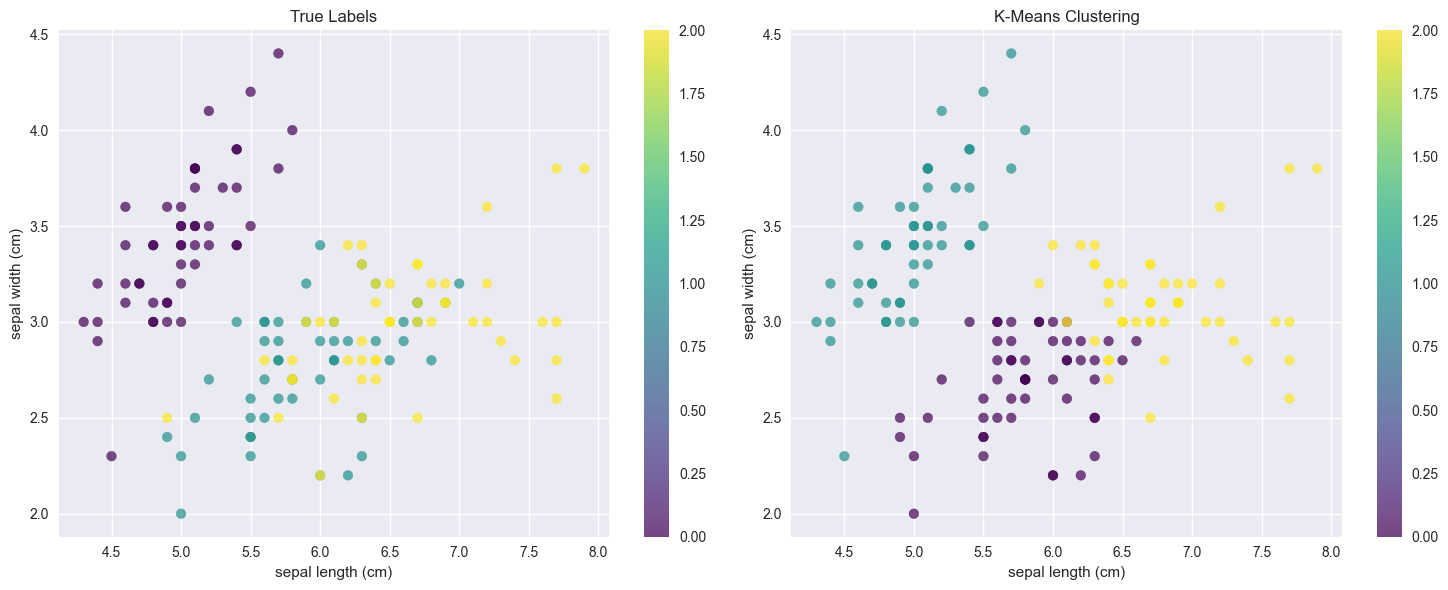

In [9]:
# Visualize K-Means clustering results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# True labels
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('True Labels')
plt.colorbar(scatter1, ax=axes[0])

# K-Means labels
scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])
axes[1].set_title('K-Means Clustering')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()


## 5. Hierarchical Clustering


In [10]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

print("Hierarchical clustering assignments:")
print(np.bincount(hierarchical_labels))


Hierarchical clustering assignments:
[71 49 30]


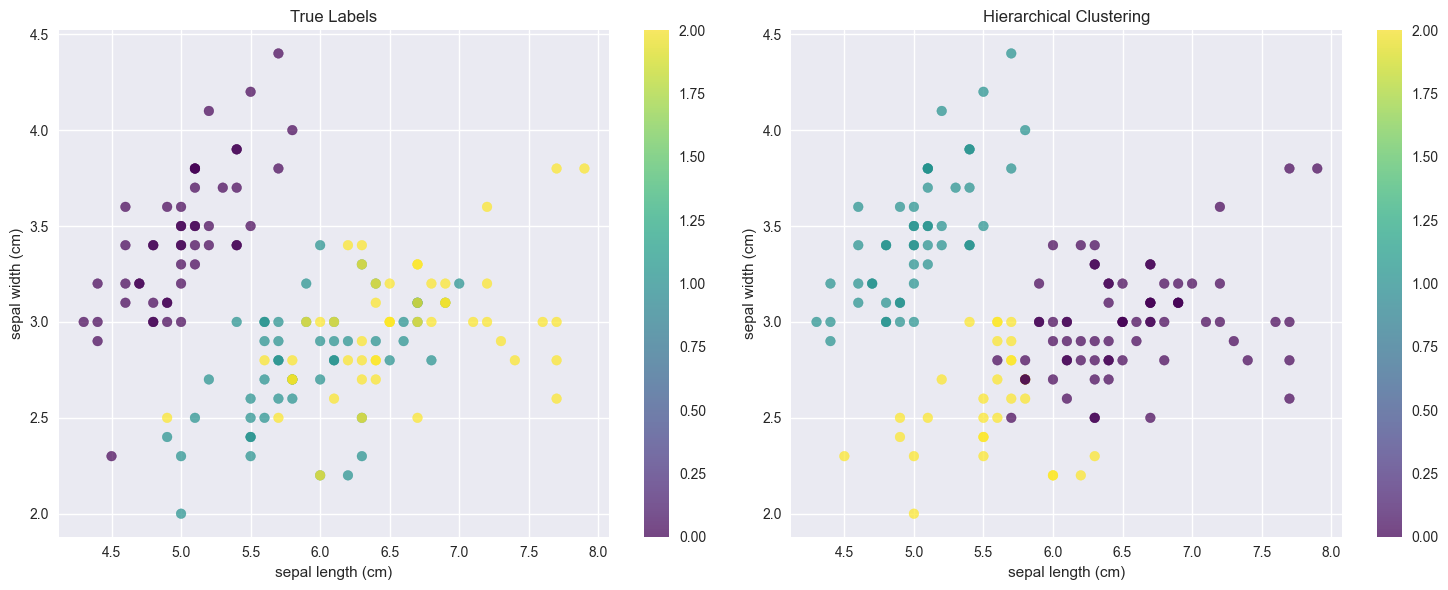

In [11]:
# Visualize Hierarchical clustering results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# True labels
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('True Labels')
plt.colorbar(scatter1, ax=axes[0])

# Hierarchical labels
scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.7)
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])
axes[1].set_title('Hierarchical Clustering')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()


## 6. DBSCAN Clustering


In [12]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

print("DBSCAN clustering assignments:")
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        print(f"Noise points: {np.sum(dbscan_labels == label)}")
    else:
        print(f"Cluster {label}: {np.sum(dbscan_labels == label)} points")

print(f"\nNumber of clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Number of noise points: {np.sum(dbscan_labels == -1)}")


DBSCAN clustering assignments:
Noise points: 34
Cluster 0: 45 points
Cluster 1: 71 points

Number of clusters: 2
Number of noise points: 34


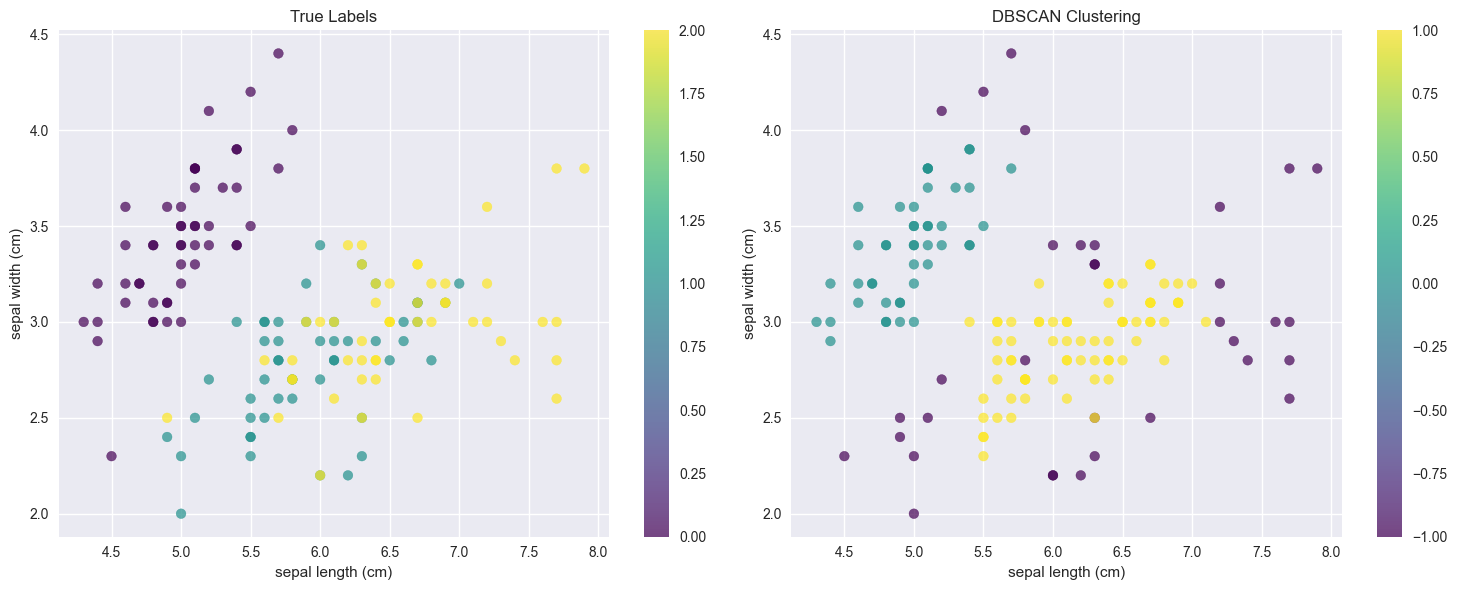

In [13]:
# Visualize DBSCAN clustering results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# True labels
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('True Labels')
plt.colorbar(scatter1, ax=axes[0])

# DBSCAN labels
scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])
axes[1].set_title('DBSCAN Clustering')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()


## 7. Clustering Evaluation


In [14]:
# Calculate Adjusted Rand Index (ARI) for clustering evaluation
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
hierarchical_ari = adjusted_rand_score(y, hierarchical_labels)
dbscan_ari = adjusted_rand_score(y, dbscan_labels)

print("Adjusted Rand Index (ARI) - Higher is better:")
print(f"K-Means: {kmeans_ari:.3f}")
print(f"Hierarchical: {hierarchical_ari:.3f}")
print(f"DBSCAN: {dbscan_ari:.3f}")


Adjusted Rand Index (ARI) - Higher is better:
K-Means: 0.620
Hierarchical: 0.615
DBSCAN: 0.442


In [15]:
# Calculate Silhouette Score for clustering evaluation
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)

# Only calculate silhouette for DBSCAN if it has more than 1 cluster
if len(np.unique(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette = "N/A (only one cluster)"

print("Silhouette Score - Higher is better:")
print(f"K-Means: {kmeans_silhouette:.3f}")
print(f"Hierarchical: {hierarchical_silhouette:.3f}")
print(f"DBSCAN: {dbscan_silhouette}")


Silhouette Score - Higher is better:
K-Means: 0.460
Hierarchical: 0.447
DBSCAN: 0.3565164814270073


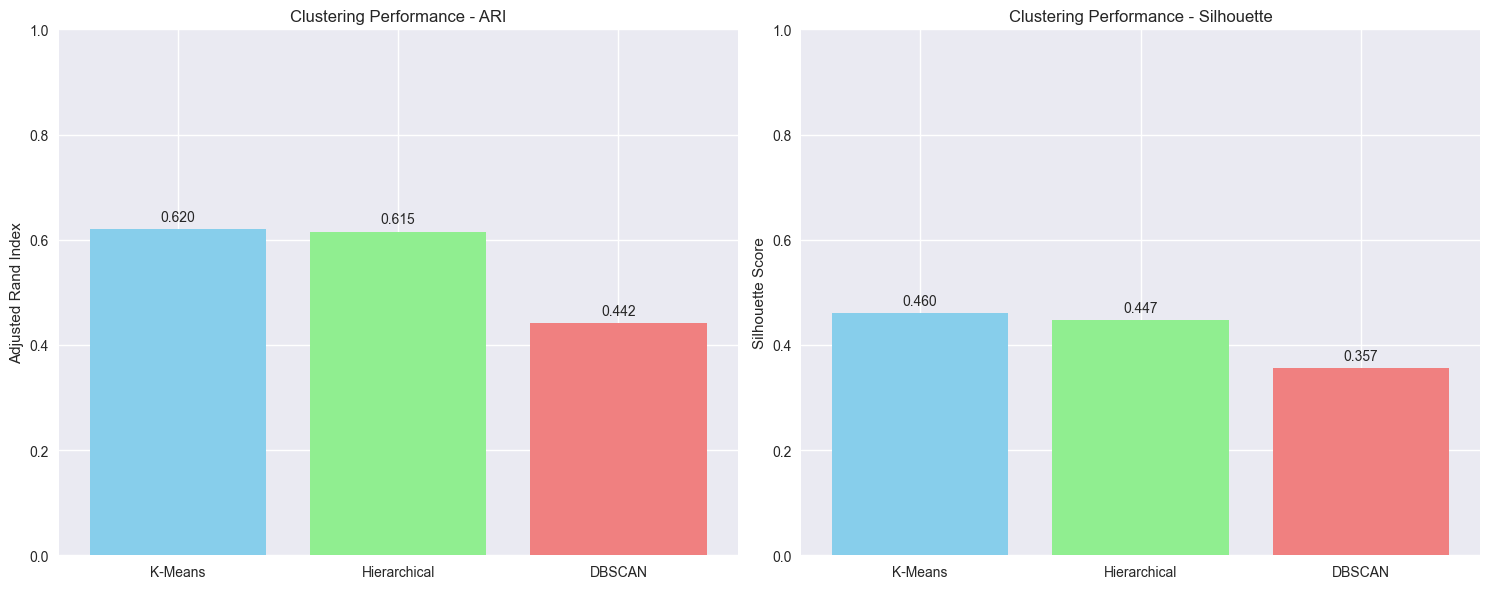

In [16]:
# Create comparison plot
methods = ['K-Means', 'Hierarchical', 'DBSCAN']
ari_scores = [kmeans_ari, hierarchical_ari, dbscan_ari]
silhouette_scores = [kmeans_silhouette, hierarchical_silhouette, 
                     dbscan_silhouette if isinstance(dbscan_silhouette, float) else 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ARI comparison
bars1 = ax1.bar(methods, ari_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax1.set_ylabel('Adjusted Rand Index')
ax1.set_title('Clustering Performance - ARI')
ax1.set_ylim(0, 1)
for bar, score in zip(bars1, ari_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Silhouette comparison
bars2 = ax2.bar(methods, silhouette_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Clustering Performance - Silhouette')
ax2.set_ylim(0, 1)
for bar, score in zip(bars2, silhouette_scores):
    if isinstance(score, float):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{score:.3f}', ha='center', va='bottom')
    else:
        ax2.text(bar.get_x() + bar.get_width()/2, 0.5, 
                 'N/A', ha='center', va='center')

plt.tight_layout()
plt.show()


## 8. Exercise: Try Different Parameters

### Exercise 1: K-Means with Different k Values
Try K-Means with k=2 and k=4. Compare the results with k=3.


K-Means Comparison:
k=2 - ARI: 0.568, Silhouette: 0.582
k=3 - ARI: 0.620, Silhouette: 0.460
k=4 - ARI: 0.473, Silhouette: 0.387


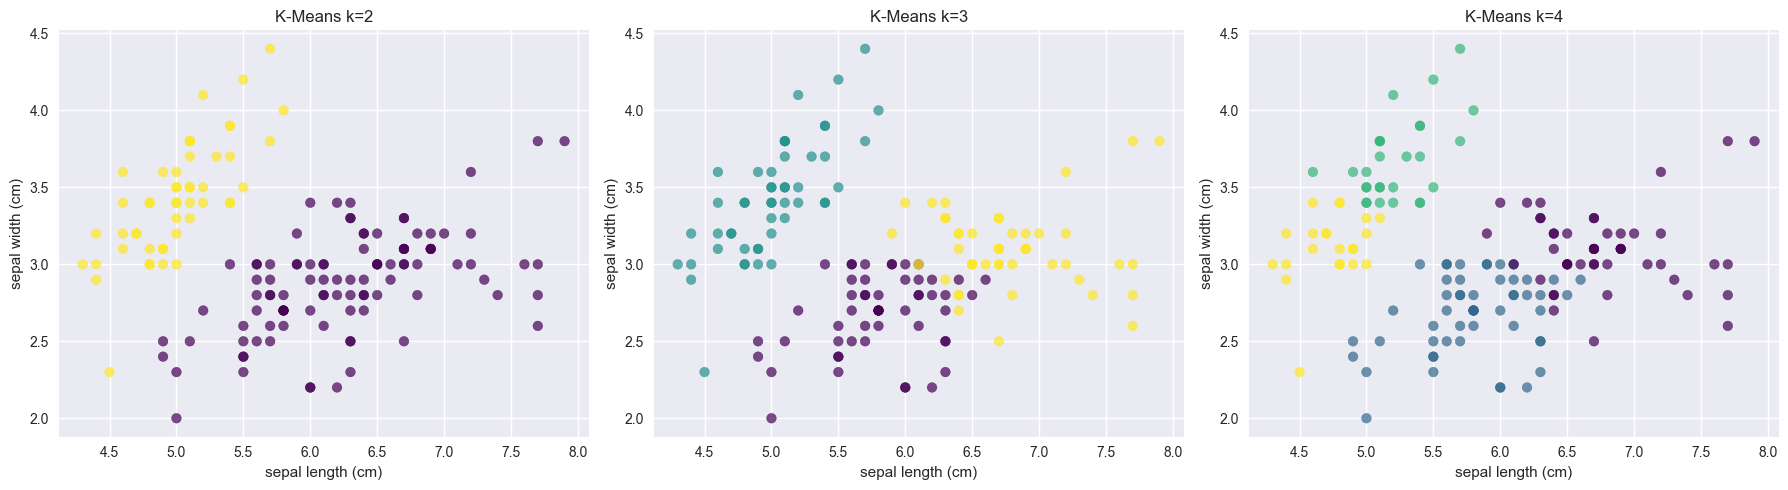

In [17]:
# TODO: Implement K-Means with k=2 and k=4
# Compare the results and discuss which k value works best

# K-Means with k=2
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_k2_labels = kmeans_k2.fit_predict(X_scaled)
kmeans_k2_ari = adjusted_rand_score(y, kmeans_k2_labels)
kmeans_k2_silhouette = silhouette_score(X_scaled, kmeans_k2_labels)

# K-Means with k=4
kmeans_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_k4_labels = kmeans_k4.fit_predict(X_scaled)
kmeans_k4_ari = adjusted_rand_score(y, kmeans_k4_labels)
kmeans_k4_silhouette = silhouette_score(X_scaled, kmeans_k4_labels)

print("K-Means Comparison:")
print(f"k=2 - ARI: {kmeans_k2_ari:.3f}, Silhouette: {kmeans_k2_silhouette:.3f}")
print(f"k=3 - ARI: {kmeans_ari:.3f}, Silhouette: {kmeans_silhouette:.3f}")
print(f"k=4 - ARI: {kmeans_k4_ari:.3f}, Silhouette: {kmeans_k4_silhouette:.3f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_k2_labels, cmap='viridis', alpha=0.7)
axes[0].set_title('K-Means k=2')
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])

scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[1].set_title('K-Means k=3')
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])

scatter3 = axes[2].scatter(X[:, 0], X[:, 1], c=kmeans_k4_labels, cmap='viridis', alpha=0.7)
axes[2].set_title('K-Means k=4')
axes[2].set_xlabel(feature_names[0])
axes[2].set_ylabel(feature_names[1])

plt.tight_layout()
plt.show()


### Exercise 2: DBSCAN Parameter Tuning
Try different values of eps and min_samples for DBSCAN. How do they affect the clustering results?


DBSCAN Parameter Tuning Results:
eps=0.3, min_samples=3: 10 clusters, 84 noise, ARI=0.174, Silhouette=-0.147
eps=0.3, min_samples=5: 3 clusters, 120 noise, ARI=0.088, Silhouette=-0.194
eps=0.3, min_samples=10: 0 clusters, 150 noise, ARI=0.000, Silhouette=0.000
eps=0.5, min_samples=3: 7 clusters, 17 noise, ARI=0.453, Silhouette=0.160
eps=0.5, min_samples=5: 2 clusters, 34 noise, ARI=0.442, Silhouette=0.357
eps=0.5, min_samples=10: 3 clusters, 89 noise, ARI=0.279, Silhouette=0.009
eps=0.7, min_samples=3: 2 clusters, 5 noise, ARI=0.550, Silhouette=0.508
eps=0.7, min_samples=5: 2 clusters, 6 noise, ARI=0.540, Silhouette=0.523
eps=0.7, min_samples=10: 2 clusters, 20 noise, ARI=0.494, Silhouette=0.423
eps=1.0, min_samples=3: 2 clusters, 1 noise, ARI=0.558, Silhouette=0.505
eps=1.0, min_samples=5: 2 clusters, 3 noise, ARI=0.554, Silhouette=0.538
eps=1.0, min_samples=10: 2 clusters, 4 noise, ARI=0.550, Silhouette=0.539

Best parameters: eps=1.0, min_samples=3
Best ARI: 0.558


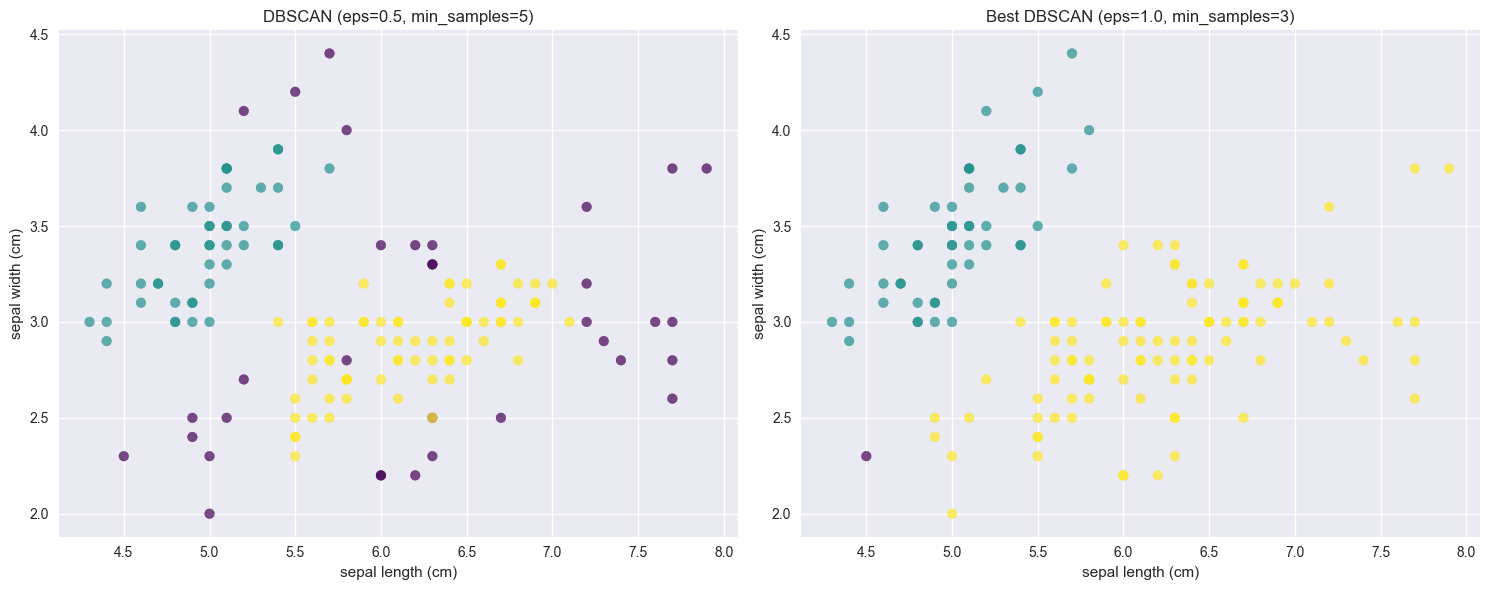

In [18]:
# TODO: Try different DBSCAN parameters
# Experiment with eps values: 0.3, 0.7, 1.0
# Experiment with min_samples values: 3, 5, 10
# Compare the results

eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

print("DBSCAN Parameter Tuning Results:")
print("=" * 50)

results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_temp = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_temp_labels = dbscan_temp.fit_predict(X_scaled)
        
        n_clusters = len(np.unique(dbscan_temp_labels)) - (1 if -1 in dbscan_temp_labels else 0)
        n_noise = np.sum(dbscan_temp_labels == -1)
        
        if n_clusters > 1:
            ari = adjusted_rand_score(y, dbscan_temp_labels)
            silhouette = silhouette_score(X_scaled, dbscan_temp_labels)
        else:
            ari = 0
            silhouette = 0
            
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'ari': ari,
            'silhouette': silhouette
        })
        
        print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters, {n_noise} noise, ARI={ari:.3f}, Silhouette={silhouette:.3f}")

# Find best parameters
best_result = max(results, key=lambda x: x['ari'])
print(f"\nBest parameters: eps={best_result['eps']}, min_samples={best_result['min_samples']}")
print(f"Best ARI: {best_result['ari']:.3f}")

# Visualize best DBSCAN result
dbscan_best = DBSCAN(eps=best_result['eps'], min_samples=best_result['min_samples'])
dbscan_best_labels = dbscan_best.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original DBSCAN
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
axes[0].set_title(f'DBSCAN (eps=0.5, min_samples=5)')
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])

# Best DBSCAN
scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_best_labels, cmap='viridis', alpha=0.7)
axes[1].set_title(f'Best DBSCAN (eps={best_result["eps"]}, min_samples={best_result["min_samples"]})')
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])

plt.tight_layout()
plt.show()


### Exercise 3: Feature Selection Impact
Try clustering using only 2 features instead of all 4. How does this affect the clustering performance?


Feature Selection Impact on Clustering:
sepal length (cm), sepal width (cm)      | K-Means: ARI=0.519, Sil=0.439 | Hierarchical: ARI=0.547, Sil=0.439
sepal length (cm), petal length (cm)     | K-Means: ARI=0.563, Sil=0.545 | Hierarchical: ARI=0.642, Sil=0.536
sepal length (cm), petal width (cm)      | K-Means: ARI=0.605, Sil=0.509 | Hierarchical: ARI=0.773, Sil=0.488
sepal width (cm), petal length (cm)      | K-Means: ARI=0.539, Sil=0.477 | Hierarchical: ARI=0.610, Sil=0.457
sepal width (cm), petal width (cm)       | K-Means: ARI=0.591, Sil=0.462 | Hierarchical: ARI=0.573, Sil=0.448
petal length (cm), petal width (cm)      | K-Means: ARI=0.886, Sil=0.674 | Hierarchical: ARI=0.636, Sil=0.610
All Features         | K-Means: ARI=0.620, Sil=0.460 | Hierarchical: ARI=0.615, Sil=0.447

Best 2-feature combination for K-Means: petal length (cm), petal width (cm)
Best 2-feature combination for Hierarchical: sepal length (cm), petal width (cm)


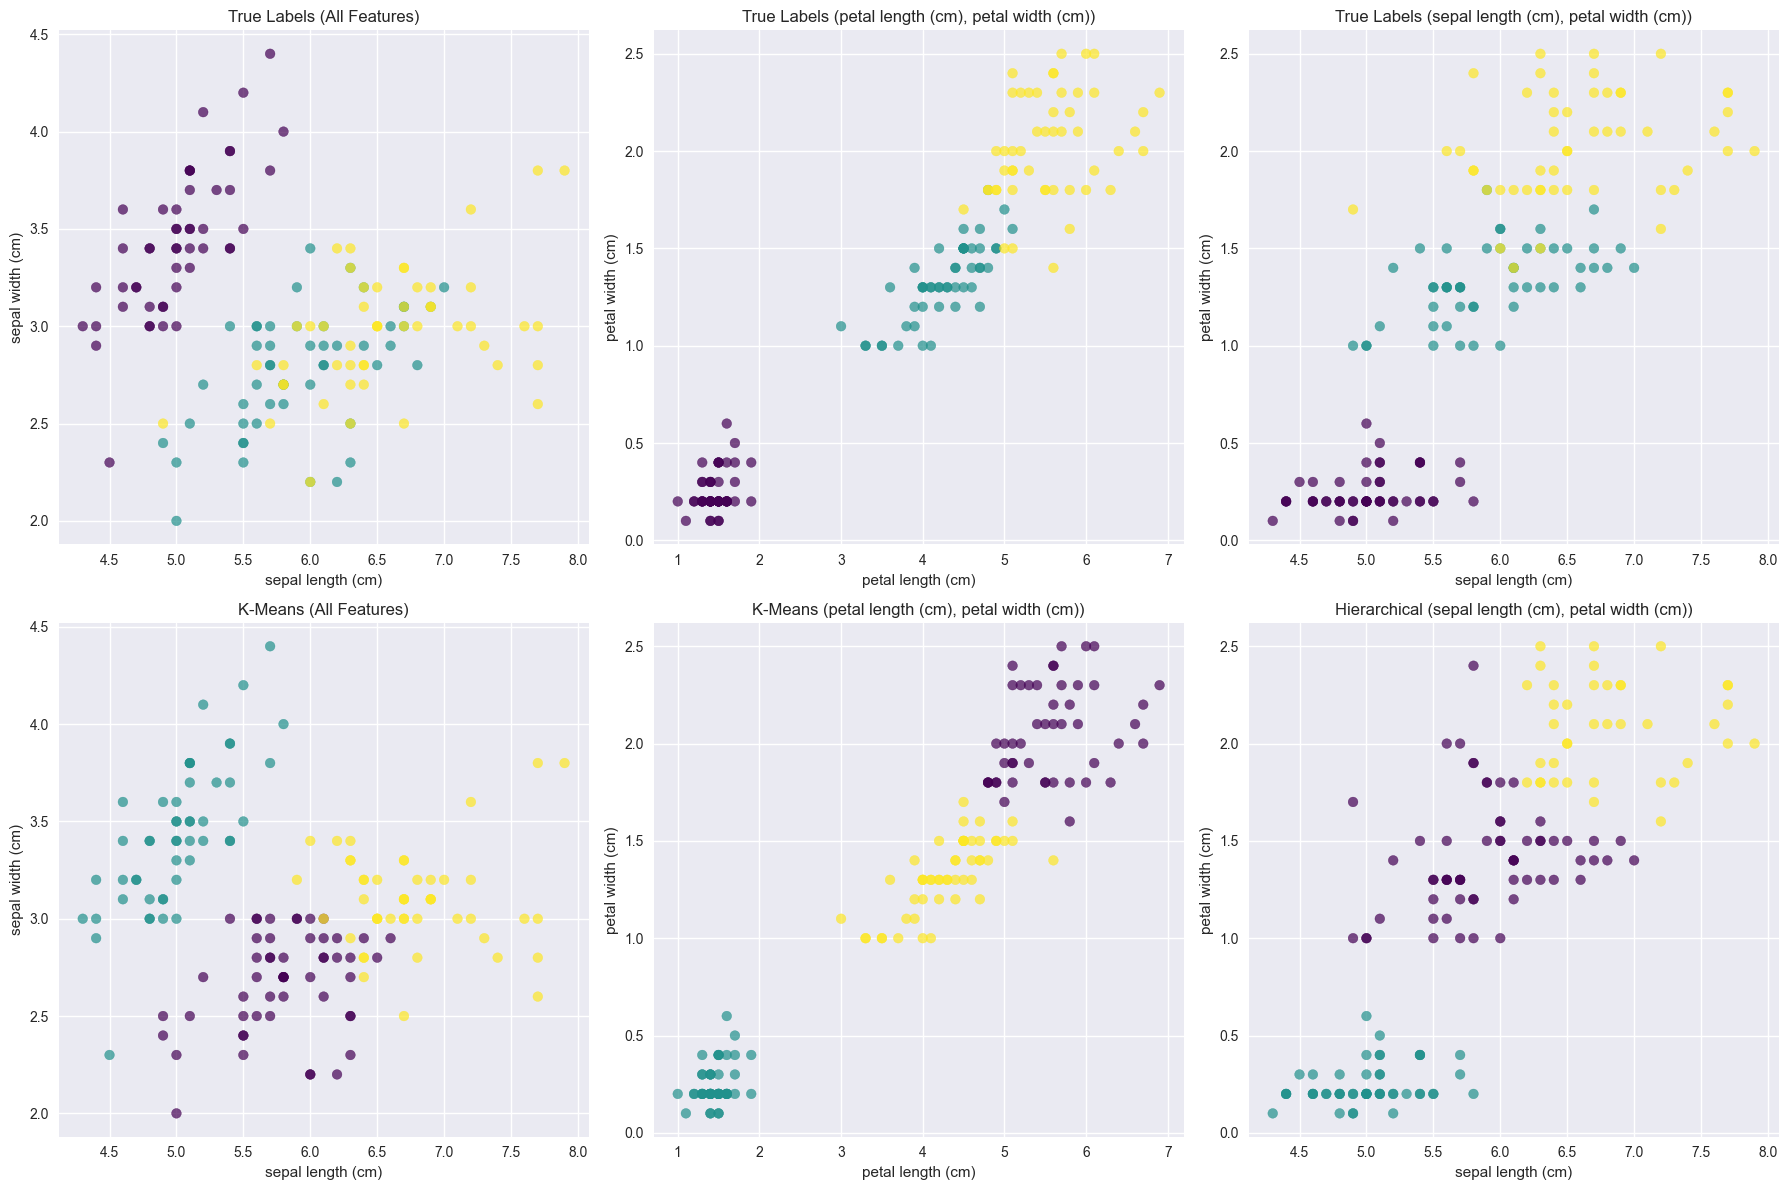

In [24]:
# TODO: Try clustering with only 2 features
# Compare results when using all features vs. subset of features
# Which feature combinations work best?

# Try different 2-feature combinations
feature_combinations = [
    [0, 1],  # sepal length, sepal width
    [0, 2],  # sepal length, petal length
    [0, 3],  # sepal length, petal width
    [1, 2],  # sepal width, petal length
    [1, 3],  # sepal width, petal width
    [2, 3],  # petal length, petal width
]

print("Feature Selection Impact on Clustering:")
print("=" * 60)

feature_results = []

for i, (feat1, feat2) in enumerate(feature_combinations):
    # Use only 2 features
    X_2d = X_scaled[:, [feat1, feat2]]
    
    # Apply K-Means
    kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans_2d_labels = kmeans_2d.fit_predict(X_2d)
    kmeans_2d_ari = adjusted_rand_score(y, kmeans_2d_labels)
    kmeans_2d_silhouette = silhouette_score(X_2d, kmeans_2d_labels)
    
    # Apply Hierarchical
    hierarchical_2d = AgglomerativeClustering(n_clusters=3)
    hierarchical_2d_labels = hierarchical_2d.fit_predict(X_2d)
    hierarchical_2d_ari = adjusted_rand_score(y, hierarchical_2d_labels)
    hierarchical_2d_silhouette = silhouette_score(X_2d, hierarchical_2d_labels)
    
    feature_name = f"{feature_names[feat1]}, {feature_names[feat2]}"
    
    feature_results.append({
        'features': feature_name,
        'feat_idx': (feat1, feat2),
        'kmeans_ari': kmeans_2d_ari,
        'kmeans_silhouette': kmeans_2d_silhouette,
        'hierarchical_ari': hierarchical_2d_ari,
        'hierarchical_silhouette': hierarchical_2d_silhouette,
        'X_2d': X_2d,
        'kmeans_labels': kmeans_2d_labels,
        'hierarchical_labels': hierarchical_2d_labels
    })
    
    print(f"{feature_name:40} | K-Means: ARI={kmeans_2d_ari:.3f}, Sil={kmeans_2d_silhouette:.3f} | Hierarchical: ARI={hierarchical_2d_ari:.3f}, Sil={hierarchical_2d_silhouette:.3f}")

# Compare with all features
print(f"{'All Features':20} | K-Means: ARI={kmeans_ari:.3f}, Sil={kmeans_silhouette:.3f} | Hierarchical: ARI={hierarchical_ari:.3f}, Sil={hierarchical_silhouette:.3f}")

# Find best 2-feature combination
best_kmeans = max(feature_results, key=lambda x: x['kmeans_ari'])
best_hierarchical = max(feature_results, key=lambda x: x['hierarchical_ari'])

print(f"\nBest 2-feature combination for K-Means: {best_kmeans['features']}")
print(f"Best 2-feature combination for Hierarchical: {best_hierarchical['features']}")

# Visualize best results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original data with all features (using first 2 for visualization)
axes[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[0, 0].set_title('True Labels (All Features)')
axes[0, 0].set_xlabel(feature_names[0])
axes[0, 0].set_ylabel(feature_names[1])

axes[1, 0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[1, 0].set_title('K-Means (All Features)')
axes[1, 0].set_xlabel(feature_names[0])
axes[1, 0].set_ylabel(feature_names[1])

# Best K-Means 2-feature result
feat1_idx, feat2_idx = best_kmeans['feat_idx']

axes[0, 1].scatter(X[:, feat1_idx], X[:, feat2_idx], c=y, cmap='viridis', alpha=0.7)
axes[0, 1].set_title(f'True Labels ({best_kmeans["features"]})')
axes[0, 1].set_xlabel(feature_names[feat1_idx])
axes[0, 1].set_ylabel(feature_names[feat2_idx])

axes[1, 1].scatter(X[:, feat1_idx], X[:, feat2_idx], c=best_kmeans['kmeans_labels'], cmap='viridis', alpha=0.7)
axes[1, 1].set_title(f'K-Means ({best_kmeans["features"]})')
axes[1, 1].set_xlabel(feature_names[feat1_idx])
axes[1, 1].set_ylabel(feature_names[feat2_idx])

# Best Hierarchical 2-feature result
feat1_idx, feat2_idx = best_hierarchical['feat_idx']

axes[0, 2].scatter(X[:, feat1_idx], X[:, feat2_idx], c=y, cmap='viridis', alpha=0.7)
axes[0, 2].set_title(f'True Labels ({best_hierarchical["features"]})')
axes[0, 2].set_xlabel(feature_names[feat1_idx])
axes[0, 2].set_ylabel(feature_names[feat2_idx])

axes[1, 2].scatter(X[:, feat1_idx], X[:, feat2_idx], c=best_hierarchical['hierarchical_labels'], cmap='viridis', alpha=0.7)
axes[1, 2].set_title(f'Hierarchical ({best_hierarchical["features"]})')
axes[1, 2].set_xlabel(feature_names[feat1_idx])
axes[1, 2].set_ylabel(feature_names[feat2_idx])

plt.tight_layout()
plt.show()


## 9. Summary and Conclusions

### Key Takeaways:
1. **K-Means**: Works well when clusters are spherical and roughly equal in size
2. **Hierarchical Clustering**: Good for exploring cluster structure and doesn't require specifying number of clusters beforehand
3. **DBSCAN**: Excellent for finding clusters of arbitrary shapes and identifying outliers
4. **Data Preprocessing**: Standardization is crucial for clustering algorithms
5. **Evaluation**: Use multiple metrics (ARI, Silhouette Score) to assess clustering quality


## 10. PCA Visualization of Clusters

Visualize the dataset in 2D using PCA to see separability and compare clustering outputs against true labels.


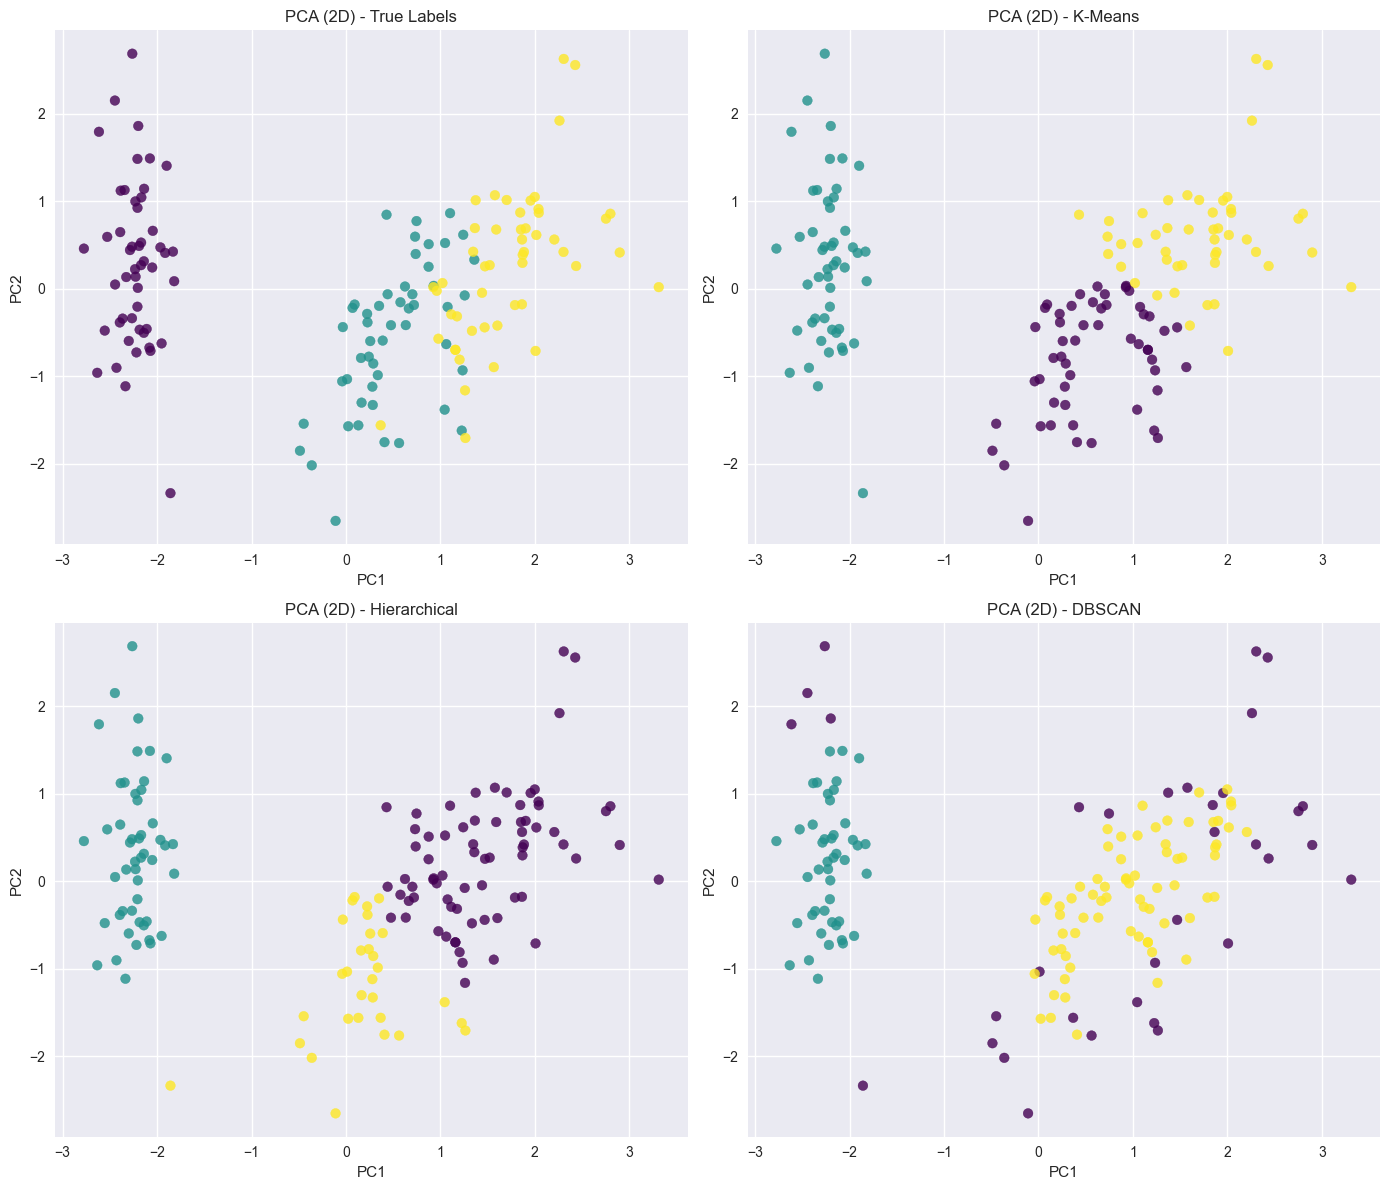

Explained variance ratio (PC1, PC2): [0.73  0.229]


In [20]:
# PCA projection to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# True labels
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
axes[0, 0].set_title('PCA (2D) - True Labels')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')

# K-Means
axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.8)
axes[0, 1].set_title('PCA (2D) - K-Means')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')

# Hierarchical
axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.8)
axes[1, 0].set_title('PCA (2D) - Hierarchical')
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')

# DBSCAN
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.8)
axes[1, 1].set_title('PCA (2D) - DBSCAN')
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')

plt.tight_layout()
plt.show()

print('Explained variance ratio (PC1, PC2):', np.round(pca.explained_variance_ratio_, 3))


## 11. Hierarchical Clustering Dendrogram

Use a dendrogram to visualize the agglomerative clustering merge distances and an example horizontal cut around 3 clusters.


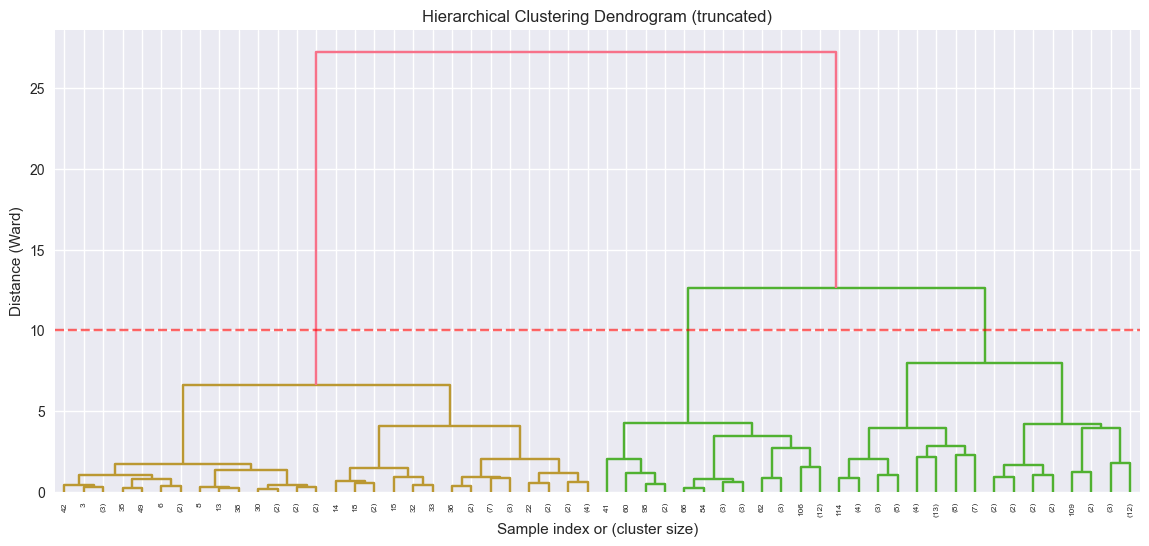

In [21]:
# Dendrogram using scipy linkage on standardized features
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(14, 6))
dendrogram(Z, truncate_mode='level', p=5, color_threshold=None)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance (Ward)')
plt.axhline(y=10, color='r', linestyle='--', alpha=0.6)  # example cut line
plt.show()


## 12. Silhouette Plots

Visual diagnostic of how well samples fit within clusters for each method.


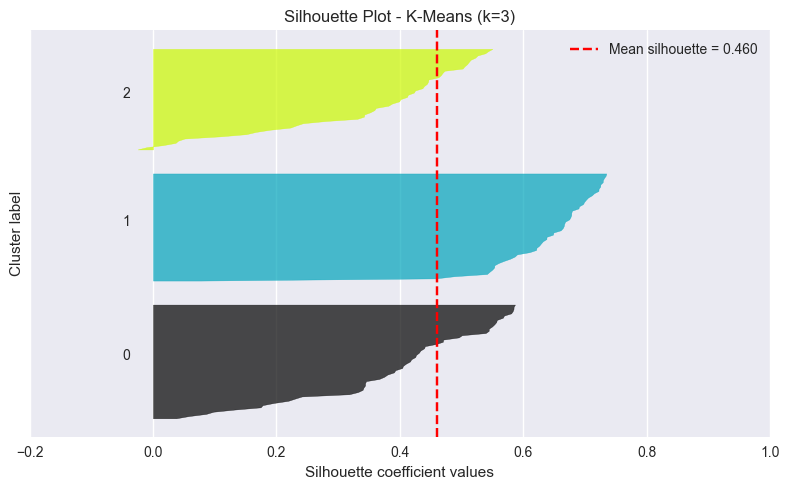

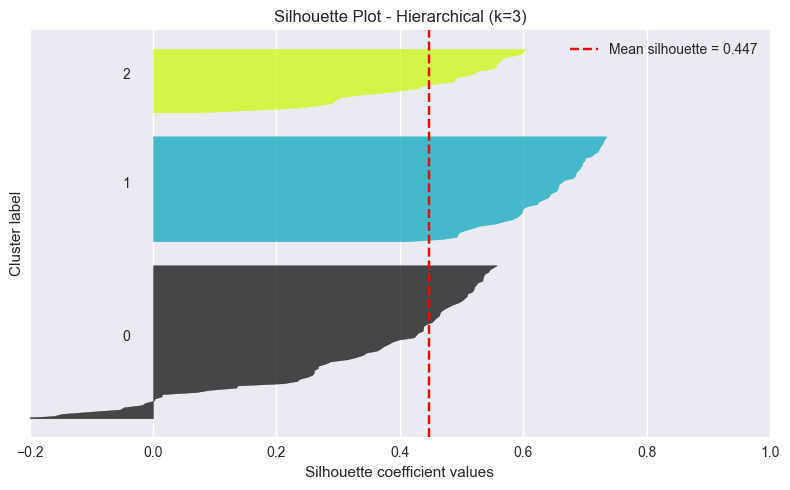

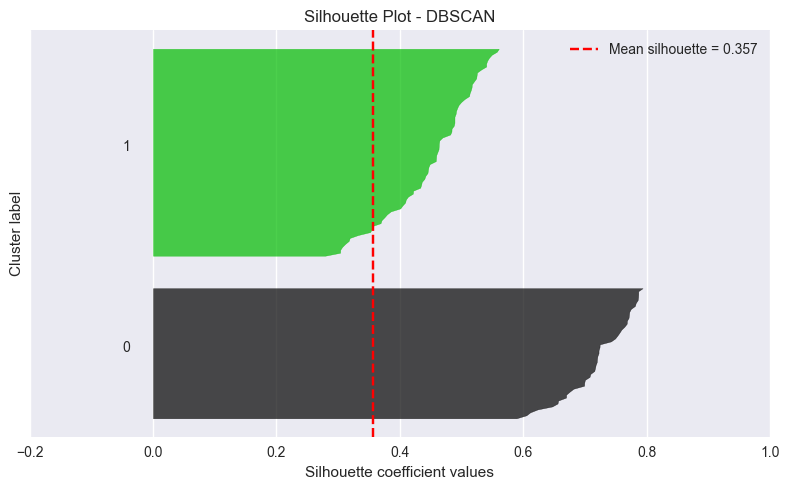

In [22]:
from sklearn.metrics import silhouette_samples


def plot_silhouette(X_data, labels, title):
    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        print(f"{title}: silhouette plot not applicable (n_clusters < 2)")
        return
    sample_sil = silhouette_samples(X_data, labels)
    mean_sil = silhouette_score(X_data, labels)

    y_lower = 10
    fig, ax = plt.subplots(figsize=(8, 5))
    for cl in sorted(np.unique(labels)):
        if cl == -1:  # skip noise cluster for silhouette bars
            continue
        cl_sil = sample_sil[labels == cl]
        cl_sil.sort()
        size_cl = cl_sil.shape[0]
        y_upper = y_lower + size_cl
        color = plt.cm.nipy_spectral(float(cl) / max(1, n_clusters))
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cl_sil, facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cl, str(cl))
        y_lower = y_upper + 10

    ax.axvline(mean_sil, color='red', linestyle='--', label=f'Mean silhouette = {mean_sil:.3f}')
    ax.set_title(title)
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster label')
    ax.set_yticks([])
    ax.set_xlim([-0.2, 1])
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Plot for each method using standardized features
plot_silhouette(X_scaled, kmeans_labels, 'Silhouette Plot - K-Means (k=3)')
plot_silhouette(X_scaled, hierarchical_labels, 'Silhouette Plot - Hierarchical (k=3)')
if len(np.unique(dbscan_labels)) > 1:
    plot_silhouette(X_scaled, dbscan_labels, 'Silhouette Plot - DBSCAN')
else:
    print('Silhouette Plot - DBSCAN: not applicable (single cluster or all noise)')


## 13. Cluster-to-Label Mapping Accuracy

Map cluster IDs to ground-truth labels via majority vote to compute approximate accuracy for each method.


In [23]:
from collections import Counter

def cluster_label_mapping_accuracy(true_labels, cluster_labels):
    mapping = {}
    for cl in np.unique(cluster_labels):
        if cl == -1:
            continue
        majority_true = Counter(true_labels[cluster_labels == cl]).most_common(1)[0][0]
        mapping[cl] = majority_true
    mapped = np.array([mapping.get(cl, -1) for cl in cluster_labels])
    accuracy = np.mean(mapped == true_labels)
    return accuracy, mapping

methods_labels = {
    'K-Means': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'DBSCAN': dbscan_labels,
}

for name, labels in methods_labels.items():
    if len(np.unique(labels)) <= 1:
        print(f"{name}: Not applicable (single cluster)")
        continue
    acc, mapping = cluster_label_mapping_accuracy(y, labels)
    print(f"{name}: Approx accuracy = {acc:.3f}, mapping = {mapping}")


K-Means: Approx accuracy = 0.833, mapping = {0: 1, 1: 0, 2: 2}
Hierarchical: Approx accuracy = 0.827, mapping = {0: 2, 1: 0, 2: 1}
DBSCAN: Approx accuracy = 0.560, mapping = {0: 0, 1: 1}
